In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [1]:
pip install yfinance


Note: you may need to restart the kernel to use updated packages.


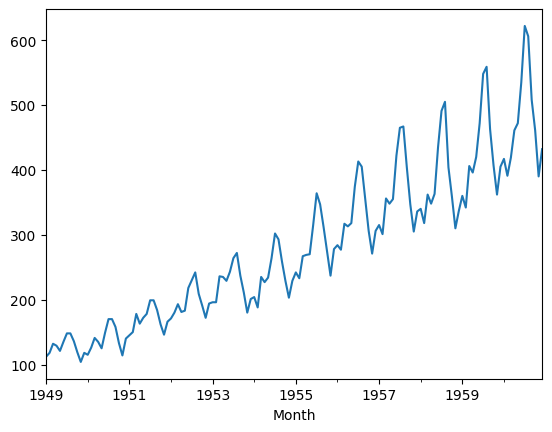

0


<ipython-input-8-ae4d82e86505>:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

# Load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/airline-passengers.csv'
df = pd.read_csv(url, header=0, parse_dates=[0], index_col=0)

# If you want to work with the 'Passengers' column as a Series (remove the 'squeeze' argument)
df = df['Passengers']  # This converts the DataFrame to a Series

# Plot the dataset to visualize the trend
df.plot()
plt.show()

# Check for missing values
print(df.isnull().sum())

# Fill missing values if necessary (using forward fill as an example)
df.fillna(method='ffill', inplace=True)

# Normalize the dataset using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(df.values.reshape(-1, 1))



In [9]:
import numpy as np

# Prepare the data (sequence formatting)
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data)-time_step-1):
        X.append(data[i:(i+time_step), 0])  # Features: previous time steps
        y.append(data[i + time_step, 0])    # Target: next time step
    return np.array(X), np.array(y)

# Define time_step, which determines how many previous time steps the model will consider for prediction
time_step = 10  # Number of previous time steps to use for prediction

X, y = create_dataset(scaled_data, time_step)

# Reshape the input to be 3D: [samples, time steps, features]
X = X.reshape(X.shape[0], X.shape[1], 1)

# Check the shape of the dataset
print(X.shape, y.shape)


(133, 10, 1) (133,)


In [10]:
from keras.models import Sequential
from keras.layers import SimpleRNN, Dense, Dropout
from keras.optimizers import Adam

# Build RNN model
model = Sequential()

# First RNN layer with 50 units
model.add(SimpleRNN(units=50, activation='relu', return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))  # Dropout layer to reduce overfitting

# Second RNN layer with 100 units
model.add(SimpleRNN(units=100, activation='relu', return_sequences=True))
model.add(Dropout(0.2))

# Third RNN layer with 200 units to increase complexity
model.add(SimpleRNN(units=200, activation='relu'))

# Output layer to predict the next value
model.add(Dense(1))

# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001), loss='mean_squared_error')

# Print model summary
model.summary()

# Train the model
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 10, 50)              │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 10, 50)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_1 (SimpleRNN)             │ (None, 10, 100)             │          15,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 10, 100)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ simple_rnn_2 (SimpleRNN)             │ (None, 200)                 │          60,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │             201 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 78,101 (305.08 KB)

 Trainable params: 78,101 (305.08 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 156ms/step - loss: 0.0675 - val_loss: 0.0293
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0200 - val_loss: 0.0909
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0114 - val_loss: 0.0349
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0078 - val_loss: 0.0206
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0074 - val_loss: 0.0350
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0083 - val_loss: 0.0332
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0055 - val_loss: 0.0216
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0061 - val_loss: 0.0202
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0043 - val_loss: 0.0260
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0045 - val_loss: 0.0202
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0060 - val_loss: 0.0125
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0054 - val_loss: 0.0143


In [11]:
# You can experiment with different optimizers and learning rates
from keras.optimizers import Adam, RMSprop, SGD

# Using RMSprop optimizer with a different learning rate
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='mean_squared_error')

# Or using SGD optimizer
# model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Train the model again with the new optimizer and hyperparameters
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 156ms/step - loss: 0.0049 - val_loss: 0.0259
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0024 - val_loss: 0.0118
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0024 - val_loss: 0.0202
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0018 - val_loss: 0.0188
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0018 - val_loss: 0.0143
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0024 - val_loss: 0.0068
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0023 - val_loss: 0.0041
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0033 - val_loss: 0.0261
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0021 - val_loss: 0.0238
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0014 - val_loss: 0.0042
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0019 - val_loss: 0.0061
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0025 - val_loss: 0.0272


In [12]:
# You can experiment with different optimizers and learning rates
from keras.optimizers import Adam, RMSprop, SGD

# Using RMSprop optimizer with a different learning rate
model.compile(optimizer=RMSprop(learning_rate=0.0005), loss='mean_squared_error')

# Or using SGD optimizer
# model.compile(optimizer=SGD(learning_rate=0.01), loss='mean_squared_error')

# Train the model again with the new optimizer and hyperparameters
model.fit(X, y, epochs=50, batch_size=32, validation_split=0.2)


Epoch 1/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 159ms/step - loss: 0.0034 - val_loss: 0.0043
Epoch 2/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0027 - val_loss: 0.0083
Epoch 3/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0013 - val_loss: 0.0056
Epoch 4/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0015 - val_loss: 0.0036
Epoch 5/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0019 - val_loss: 0.0057
Epoch 6/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0015 - val_loss: 0.0154
Epoch 7/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0016 - val_loss: 0.0166
Epoch 8/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0017 - val_loss: 0.0113
Epoch 9/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0018 - val_loss: 0.0123
Epoch 10/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0020 - val_loss: 0.0077
Epoch 11/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0024 - val_loss: 0.0091
Epoch 12/50
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0015 - val_loss: 0.0066


5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 171ms/step
Mean Squared Error: 674.393342438171


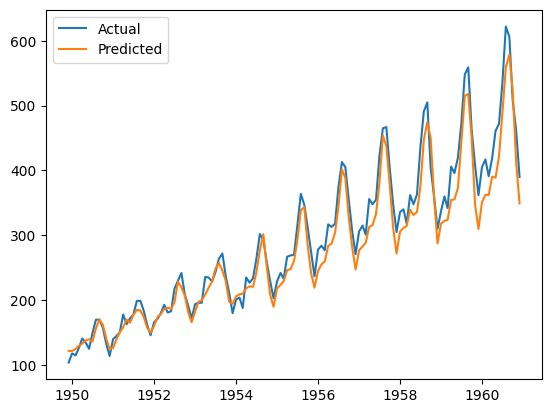

In [13]:
from sklearn.metrics import mean_squared_error

# Predict using the trained model
predictions = model.predict(X)

# Inverse transform the predictions and the original data back to the original scale
predictions_rescaled = scaler.inverse_transform(predictions)
y_rescaled = scaler.inverse_transform(y.reshape(-1, 1))

# Calculate Mean Squared Error
mse = mean_squared_error(y_rescaled, predictions_rescaled)
print(f'Mean Squared Error: {mse}')

# Plot the predicted vs actual values
plt.plot(df.index[time_step+1:], y_rescaled, label='Actual')
plt.plot(df.index[time_step+1:], predictions_rescaled, label='Predicted')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━

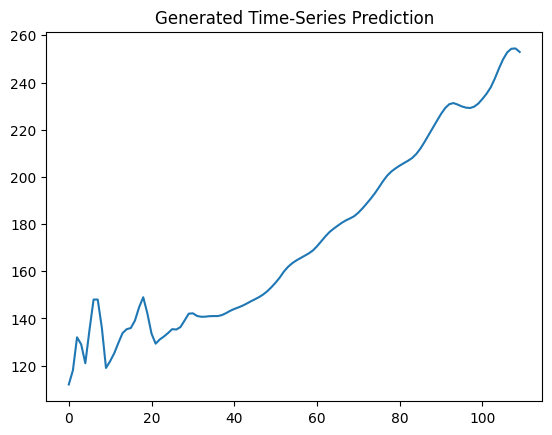

In [22]:
# Function to generate new time-series data from the trained RNN model
def generate_time_series(model, seed_input, n_steps):
    generated = seed_input
    for _ in range(n_steps):
        # Predict the next value using the RNN model
        prediction = model.predict(generated[-time_step:].reshape(1, time_step, 1))
        generated = np.append(generated, prediction)  # Append the prediction to the sequence
    return generated

# Generate the next 100 steps from the trained model
seed_input = np.array(scaled_data[:time_step])  # Use the first 'time_step' data points as input
generated_sequence = generate_time_series(model, seed_input, n_steps=100)

# Inverse transform the generated sequence back to the original scale
generated_sequence = scaler.inverse_transform(generated_sequence.reshape(-1, 1))

# Plot the generated sequence
plt.plot(generated_sequence)
plt.title('Generated Time-Series Prediction')
plt.show()


